In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


#### Custom Linear Regression

In [11]:
class custom_LinearRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        # Initialize weight and bias to zero
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # Predict the result
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate error, and gradient descent to find new weights nd bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            # update weights and bias
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db


    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

#### Datasets

In [12]:
X, y = datasets.make_regression(n_samples=100, n_features=4, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [13]:
X_train

array([[-0.58059517,  0.79975554, -0.19457399, -1.095916  ],
       [ 0.45790622, -0.68011624, -0.40286978,  1.91728485],
       [ 2.02240507, -1.54292905, -1.07529009, -0.5648753 ],
       [ 0.91484096,  0.7965119 ,  2.08787087, -0.27620335],
       [-0.9617768 , -0.64764453,  0.29714121,  1.27181862],
       [-0.45104291, -0.21015656,  1.37459323,  0.61353263],
       [-1.96601472, -0.40865031, -0.68114843,  1.04090637],
       [ 0.87674248, -0.98541846, -0.26131204, -0.48287869],
       [-0.20860081,  0.04947654,  1.01156174, -0.28324629],
       [ 1.99008302,  0.24266016,  0.15846954,  1.16418756],
       [-1.14747663, -0.08798693,  0.33225003,  0.61866969],
       [-0.20718168, -0.33617984,  1.57887425,  0.03006708],
       [-1.03335017,  1.494557  ,  0.85192763, -1.24621209],
       [-0.05455871,  0.01908996,  1.3799201 ,  0.79523395],
       [-0.34125599,  1.86956552, -0.7442297 ,  0.13451712],
       [ 0.09626794,  1.59987751, -0.47266282,  1.2292134 ],
       [ 1.00614998, -0.

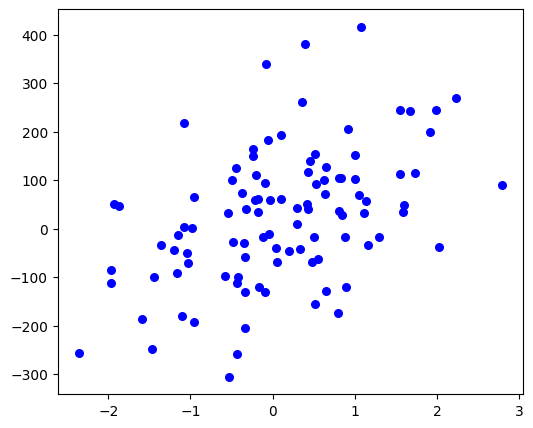

In [14]:
fig = plt.figure(figsize=(6,5))
plt.scatter(X[:,0], y, color='b', marker='o', s=30)
plt.show()

In [15]:
reg = custom_LinearRegression(lr=0.01)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [16]:
# Evaluation
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(f"Mean Square Error: {mse}")

Mean Square Error: 408.4530169075139


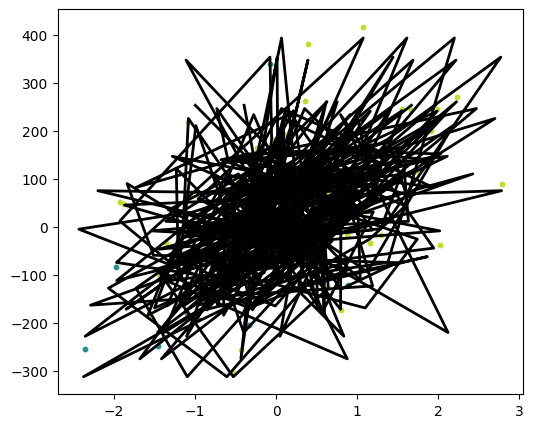

In [18]:
# plot
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(6,5))
m1 = plt.scatter(X_train[:,0], y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test[:,0], y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='prediction')
plt.show()